In [1]:
import tensorflow as tf
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices: tf.config.experimental.set_memory_growth(device, True)

In [2]:
import numpy as np
import os
import itertools
import matplotlib.pyplot as plt
import json
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Activation, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from PIL import Image, ImageChops, ImageEnhance
from tqdm.notebook import tqdm
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [3]:
def convert_to_ela_image(path,quality):

    original_image = Image.open(path).convert('RGB')

    resaved_file_name = 'resaved_image.jpg'
    original_image.save(resaved_file_name,'JPEG',quality=quality)
    resaved_image = Image.open(resaved_file_name)

    ela_image = ImageChops.difference(original_image,resaved_image)

    extrema = ela_image.getextrema()
    max_difference = max([pix[1] for pix in extrema])
    if max_difference ==0:
        max_difference = 1
    scale = 255 / max_difference

    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)

    return ela_image

In [4]:
def prepare_image(image_path):
    image_size = (128, 128)
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten() / 255.0

In [5]:
X = []
Y = []

In [6]:
!unzip Au.zip

Archive:  Au.zip
   creating: Au/
  inflating: Au/Au_ani_0001.jpg      
  inflating: Au/Au_ani_0002.jpg      
  inflating: Au/Au_ani_0003.jpg      
  inflating: Au/Au_ani_0004.jpg      
  inflating: Au/Au_ani_0005.jpg      
  inflating: Au/Au_ani_0006.jpg      
  inflating: Au/Au_ani_0007.jpg      
  inflating: Au/Au_ani_0008.jpg      
  inflating: Au/Au_ani_0009.jpg      
  inflating: Au/Au_ani_0010.jpg      
  inflating: Au/Au_ani_0011.jpg      
  inflating: Au/Au_ani_0012.jpg      
  inflating: Au/Au_ani_0013.jpg      
  inflating: Au/Au_ani_0014.jpg      
  inflating: Au/Au_ani_0015.jpg      
  inflating: Au/Au_ani_0016.jpg      
  inflating: Au/Au_ani_0017.jpg      
  inflating: Au/Au_ani_0018.jpg      
  inflating: Au/Au_ani_0019.jpg      
  inflating: Au/Au_ani_0020.jpg      
  inflating: Au/Au_ani_0021.jpg      
  inflating: Au/Au_ani_0022.jpg      
  inflating: Au/Au_ani_0023.jpg      
  inflating: Au/Au_ani_0024.jpg      
  inflating: Au/Au_ani_0025.jpg      
  inflating: Au/

In [7]:
!unzip Modified\ Tp.zip

Archive:  Modified Tp.zip
   creating: Tp/CM/
  inflating: Tp/CM/Sp_S_CND_A_pla0016_pla0016_0196.jpg  
  inflating: Tp/CM/Sp_S_CNN_A_nat0078_nat0078_0004.jpg  
  inflating: Tp/CM/Sp_S_CNN_A_pla0052_pla0052_0005.jpg  
  inflating: Tp/CM/Sp_S_CNN_A_pla0053_pla0053_0191.jpg  
  inflating: Tp/CM/Sp_S_CNN_A_pla0060_pla0060_0192.jpg  
  inflating: Tp/CM/Sp_S_CNN_A_pla0061_pla0061_0193.jpg  
  inflating: Tp/CM/Sp_S_CNN_A_pla0084_pla0084_0194.jpg  
  inflating: Tp/CM/Sp_S_CNN_R_sec0097_sec0097_0006.jpg  
  inflating: Tp/CM/Sp_S_CRN_A_ani0087_ani0087_0227.jpg  
  inflating: Tp/CM/Sp_S_CRN_A_pla0023_pla0023_0229.jpg  
  inflating: Tp/CM/Sp_S_CRN_A_pla0034_pla0034_0230.jpg  
  inflating: Tp/CM/Sp_S_CRN_A_pla0071_pla0071_0079.jpg  
  inflating: Tp/CM/Sp_S_CRN_A_pla0073_pla0073_0231.jpg  
  inflating: Tp/CM/Sp_S_CRN_A_pla0079_pla0079_0002.jpg  
  inflating: Tp/CM/Sp_S_CRN_R_nat0085_nat0085_0232.jpg  
  inflating: Tp/CM/Sp_S_CRN_R_pla0067_pla0067_0195.jpg  
  inflating: Tp/CM/Sp_S_NND_A_arc0054_arc0

In [8]:
!unzip Original\ OTp.zip

Archive:  Original OTp.zip
   creating: Original Tp/OTp/
   creating: Original Tp/OTp/CM/
  inflating: Original Tp/OTp/CM/Sp_S_CND_A_pla0016_pla0016_0196.jpg  
  inflating: Original Tp/OTp/CM/Sp_S_CNN_A_nat0078_nat0078_0004.jpg  
  inflating: Original Tp/OTp/CM/Sp_S_CNN_A_pla0052_pla0052_0005.jpg  
  inflating: Original Tp/OTp/CM/Sp_S_CNN_A_pla0053_pla0053_0191.jpg  
  inflating: Original Tp/OTp/CM/Sp_S_CNN_A_pla0060_pla0060_0192.jpg  
  inflating: Original Tp/OTp/CM/Sp_S_CNN_A_pla0061_pla0061_0193.jpg  
  inflating: Original Tp/OTp/CM/Sp_S_CNN_A_pla0084_pla0084_0194.jpg  
  inflating: Original Tp/OTp/CM/Sp_S_CNN_R_sec0097_sec0097_0006.jpg  
  inflating: Original Tp/OTp/CM/Sp_S_CRN_A_ani0087_ani0087_0227.jpg  
  inflating: Original Tp/OTp/CM/Sp_S_CRN_A_arc0007_arc0005_0228.jpg  
  inflating: Original Tp/OTp/CM/Sp_S_CRN_A_pla0023_pla0023_0229.jpg  
  inflating: Original Tp/OTp/CM/Sp_S_CRN_A_pla0034_pla0034_0230.jpg  
  inflating: Original Tp/OTp/CM/Sp_S_CRN_A_pla0071_pla0071_0079.jpg  


In [9]:
path = '/content/Au/'
for filename in tqdm(os.listdir(path),desc="Processing Images : "):
    if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('jpeg'):
        try:
            full_path = os.path.join(path, filename)
            X.append(prepare_image(full_path))
            Y.append(1)
        except:
            pass

print(f'Total images: {len(X)}\nTotal labels: {len(Y)}')

Processing Images :   0%|          | 0/800 [00:00<?, ?it/s]

Total images: 790
Total labels: 790


In [10]:
path = '/content/Tp/'
i=0
for filename in tqdm(os.listdir(path),desc="Processing Images : "):
        if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('jpeg'):
            i+=1
            try:
                full_path = os.path.join(path, filename)
                X.append(prepare_image(full_path))
                Y.append(0)
            except:
                pass


print(f'Total images: {len(X)}\nTotal labels: {len(Y)}')

Processing Images :   0%|          | 0/2 [00:00<?, ?it/s]

Total images: 790
Total labels: 790


In [11]:
from sklearn.utils import shuffle

In [12]:
X = np.array(X)
Y = np.array(Y)
X,Y= shuffle(X,Y)

X = X.reshape(-1, 128, 128, 3)



np.save('proposed_fidac_500_x.npy', X, allow_pickle=True)
np.save('proposed_fidac_500_y.npy', Y, allow_pickle=True)

In [14]:
print(np.shape(X),np.shape(Y))

(790, 128, 128, 3) (790,)


In [15]:
X_temp, X_test, Y_temp, Y_test = train_test_split(X, Y, test_size = 0.05, random_state=5)
X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size = 0.2, random_state=5)
X = X.reshape(-1,1,1,1)

print(f'Training images: {len(X_train)} , Training labels: {len(Y_train)}')
print(f'Validation images: {len(X_val)} , Validation labels: {len(Y_val)}')
print(f'Test images: {len(X_test)} , Test labels: {len(Y_test)}')

Training images: 600 , Training labels: 600
Validation images: 150 , Validation labels: 150
Test images: 40 , Test labels: 40


In [16]:
print(Y_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


In [17]:
train_gen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    #zca_whitening=False,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
)
test_gen =  ImageDataGenerator()

train_gen.fit(X_train)
test_gen.fit(X_val)

augmented_data = []

In [18]:
def build_model():
    model = Sequential()
    model.add(Conv2D(32, (5,5), activation = 'relu', input_shape = (128, 128, 3)))
    model.add(MaxPool2D(2, 2))
    model.add(Conv2D(64, (3,3), activation = 'relu'))
    model.add(MaxPool2D(2, 2))
    model.add(Conv2D(128, (3,3), activation = 'relu'))
    model.add(Conv2D(128, (3,3), activation = 'relu'))
    model.add(MaxPool2D(2, 2))
    model.add(Conv2D(256, (3,3), activation = 'relu'))
    model.add(Conv2D(256, (3,3), activation = 'relu', padding = "SAME"))
    model.add(Flatten())
    model.add(Dense(64, activation = 'relu'))
    model.add(Dropout(0.4))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation = 'sigmoid'))
    return model

In [19]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 128)       1

In [20]:
epochs = 50
batch_size = 19

In [22]:
init_lr = 1e-4
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = init_lr, decay = init_lr/epochs)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
early_stopping = EarlyStopping(monitor = 'val_accuracy',
                               min_delta = 0,
                               patience = 10,
                               verbose = 0,
                               mode = 'auto')

In [24]:
hist = model.fit(train_gen.flow(X_train, Y_train, batch_size=19),
                 batch_size = batch_size,
                 epochs = epochs,
                 #steps_per_epoch = 14,
                 validation_data = train_gen.flow(X_train, Y_train, batch_size=19))
                 #callbacks = [early_stopping])

Epoch 1/50
32/32 [==============================] - 70s 2s/step - loss: 0.1872 - accuracy: 0.9900 - val_loss: 3.1085e-09 - val_accuracy: 1.0000
Epoch 2/50
32/32 [==============================] - 67s 2s/step - loss: 3.5799e-05 - accuracy: 1.0000 - val_loss: 5.9031e-13 - val_accuracy: 1.0000
Epoch 3/50
32/32 [==============================] - 66s 2s/step - loss: 4.8301e-09 - accuracy: 1.0000 - val_loss: 1.5646e-12 - val_accuracy: 1.0000
Epoch 4/50
32/32 [==============================] - 58s 2s/step - loss: 1.6414e-05 - accuracy: 1.0000 - val_loss: 1.9294e-13 - val_accuracy: 1.0000
Epoch 5/50
32/32 [==============================] - 70s 2s/step - loss: 5.2224e-04 - accuracy: 1.0000 - val_loss: 2.2147e-13 - val_accuracy: 1.0000
Epoch 6/50
32/32 [==============================] - 66s 2s/step - loss: 0.0076 - accuracy: 0.9983 - val_loss: 2.7775e-08 - val_accuracy: 1.0000
Epoch 7/50
32/32 [==============================] - 66s 2s/step - loss: 6.6004e-06 - accuracy: 1.0000 - val_loss: 7.8588

In [25]:
model.save('ela_casia.h5')

history_dict = hist.history
json.dump(history_dict, open('model_history', 'w'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


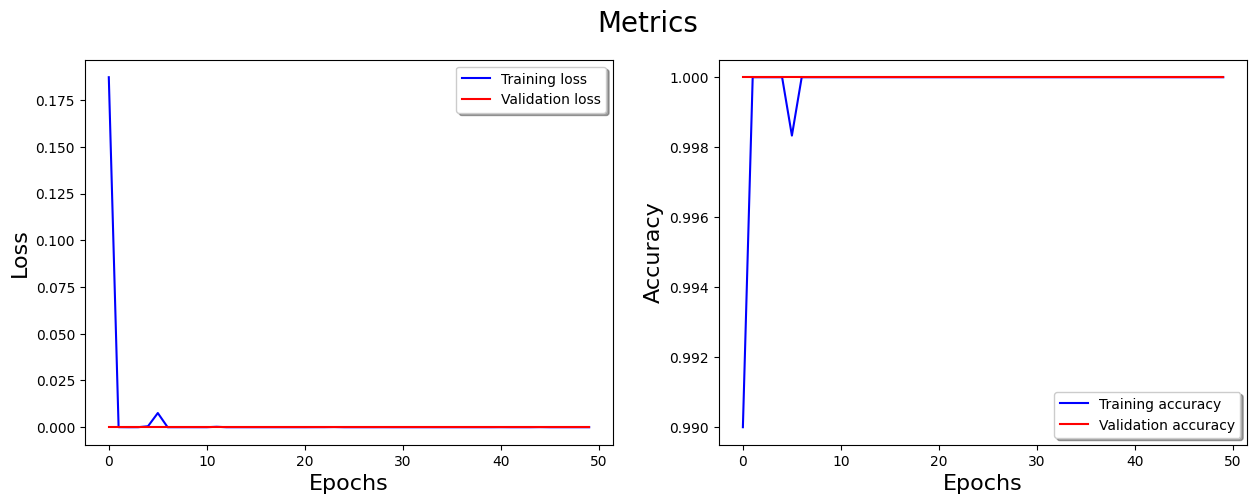

In [26]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(history_dict['loss'], color='b', label = "Training loss")
ax[0].plot(history_dict['val_loss'], color='r', label = "Validation loss",axes =ax[0])
ax[0].set_xlabel('Epochs',fontsize=16)
ax[0].set_ylabel('Loss',fontsize=16)
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_dict['accuracy'], color='b', label = "Training accuracy")
ax[1].plot(history_dict['val_accuracy'], color='r',label = "Validation accuracy")
ax[1].set_xlabel('Epochs',fontsize=16)
ax[1].set_ylabel('Accuracy',fontsize=16)
legend = ax[1].legend(loc='best', shadow=True)

fig.suptitle('Metrics',fontsize=20);

In [27]:
def plot_confusion_matrix(cf_matrix):

    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

    axes_labels=['Forged', 'Authentic']
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='',cmap="flare" , xticklabels=axes_labels, yticklabels=axes_labels)

    plot_xlabel = plt.xlabel('Predicted labels', fontsize = 13)
    plot_ylabel = plt.ylabel('True labels', fontsize = 13)
    plot_title = plt.title('Confusion Matrix', fontsize= 10,fontweight='bold')

In [29]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       150

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [30]:
class_names = ['Forged', 'Authentic']

In [31]:
correct_test = 0
total_test = 0

for index,image in enumerate(tqdm(X_test,desc="Processing Images : ")):
    image = image.reshape(-1, 128, 128, 3)
    y_pred = model.predict(image)
    y_pred_class = np.round(y_pred)
    total_test += 1
    if y_pred_class == Y_test[index]:
        correct_test += 1

print(f'Total test images: {total_test}\nCorrectly predicted images: {correct_test}\nAccuracy: {correct_test / total_test * 100.0} %')

Processing Images :   0%|          | 0/40 [00:00<?, ?it/s]

1/1 [==============================] - 0s 41ms/step
Total test images: 40
Correctly predicted images: 40
Accuracy: 100.0 %


In [32]:
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

In [38]:
real_image = '/content/Au/'
correct_r = 0
total_r = 0
for file_name in os.listdir(real_image):
    if file_name.endswith('jpg') or file_name.endswith('png'):
        test_image_path = os.path.join(real_image, file_name)
        test_image = prepare_image(test_image_path)
        test_image=test_image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(test_image)
        y_pred_class = round(y_pred[0][0])
        total_r += 1
        if y_pred_class == 1:
            correct_r += 1
            print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')
print(f'Total: {total_r}, Correct: {correct_r}, Acc: {correct_r / total_r * 100.0}')

1/1 [==============================] - 0s 81ms/step
Class: Authentic Confidence: 100.00
1/1 [==============================] - 0s 193ms/step
Class: Authentic Confidence: 100.00
1/1 [==============================] - 0s 187ms/step
Class: Authentic Confidence: 100.00
1/1 [==============================] - 0s 141ms/step
Class: Authentic Confidence: 100.00
1/1 [==============================] - 0s 117ms/step
Class: Authentic Confidence: 100.00
1/1 [==============================] - 0s 177ms/step
Class: Authentic Confidence: 100.00
1/1 [==============================] - 0s 112ms/step
Class: Authentic Confidence: 100.00
1/1 [==============================] - 0s 148ms/step
Class: Authentic Confidence: 100.00
1/1 [==============================] - 0s 117ms/step
Class: Authentic Confidence: 100.00
1/1 [==============================] - 0s 193ms/step
Class: Authentic Confidence: 100.00
1/1 [==============================] - 0s 121ms/step
Class: Authentic Confidence: 100.00
1/1 [=================

In [39]:
correct += correct_r
total += total_r
#print(f'Total: {total_r}, Correct: {correct_r}, Acc: {correct_r / total_r * 100.0}')
print(f'Total: {total}, Correct: {correct}, Acc: {correct / total * 100.0}')

Total: 1252, Correct: 790, Acc: 63.09904153354633


1/1 [==============================] - 0s 76ms/step
Prediction: Authentic
Confidence: 100.00%
--------------------------------------------------------------------------------------------------------------


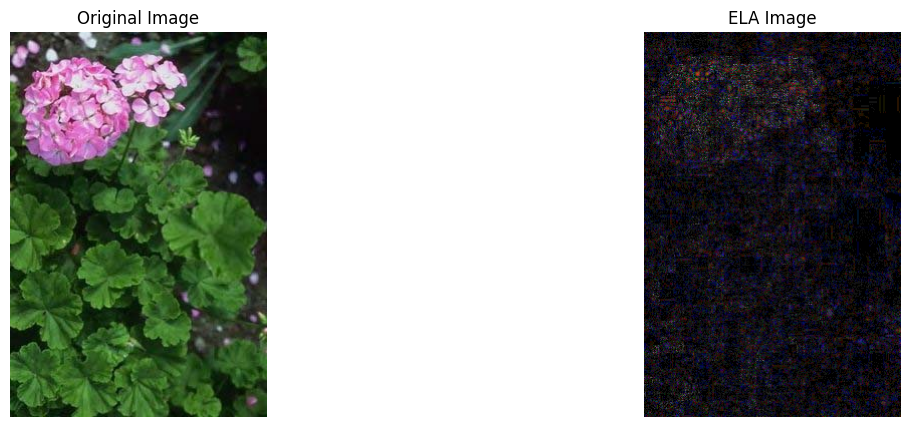

In [40]:
test_image_path = '/content/Tp/CM/Sp_S_CND_A_pla0016_pla0016_0196.jpg'    # test image path
test_image = prepare_image(test_image_path)
test_image = test_image.reshape(-1, 128, 128, 3)

y_pred = model.predict(test_image)
y_pred_class = int(round(y_pred[0][0]))

fig, ax = plt.subplots(1,2,figsize=(15,5))

original_image = plt.imread(test_image_path)
ax[0].axis('off')
ax[0].imshow(original_image)
ax[0].set_title('Original Image')

ax[1].axis('off')
ax[1].imshow(convert_to_ela_image(test_image_path,90))
ax[1].set_title('ELA Image')

print(f'Prediction: {class_names[y_pred_class]}')
if y_pred<=0.5:
    print(f'Confidence:  {(1-(y_pred[0][0])) * 100:0.2f}%')
else:
    print(f'Confidence: {(y_pred[0][0]) * 100:0.2f}%')
print('--------------------------------------------------------------------------------------------------------------')

In [43]:
test_folder_path = '/content/Au/'        #dataset path
authentic,forged,total = 0,0,0

for filename in tqdm(os.listdir(test_folder_path),desc="Processing Images : "):
    #print(filename)
    if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('jpeg') or filename.endswith('JPG'):
        test_image_path = os.path.join(test_folder_path, filename)
        test_image = prepare_image(test_image_path)
        test_image=test_image.reshape(-1, 128, 128, 3)
        #y_pred = model.predict(image)
        #y_pred_class = np.round(y_pred)

        y_pred = model.predict(test_image)
        y_pred_class = round(y_pred[0][0])

        total += 1
        #print('---',y_pred_class)
        if y_pred_class == 0:
            forged += 1
        else:
            authentic +=1

print(f'Total images: {total}\nAuthentic Images: {authentic}\nForged Images: {forged}')

Processing Images :   0%|          | 0/800 [00:00<?, ?it/s]

1/1 [==============================] - 0s 44ms/step
Total images: 800
Authentic Images: 800
Forged Images: 0
